In [1]:
#hide
options(jupyter.plot_scale = 3)
options(jupyter.display_mimetypes = c("text/html"))
options(jupyter.rich_display=FALSE)
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res=300)
options(max.print=1000)

# "R : Random Sampling and Integration"
> "전북대학교 R입문 11주차 필기"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Kim Jeewoo
- categories: [Introduction to R]
- image: images/202111119main.jpg

In [73]:
library(tidyverse)

# 랜덤변수의 생성

## runif(N): 균등분포

- `runif(N)`을 실행하면 0 ~ 1 사이의 난수를 N개 리턴한다.

- `runif(n = N, min = a, max = b)`을 실행하면 a ~ b 사이의 난수를 N개 리턴한다.

In [74]:
runif(5)

[1] 0.5709525 0.3290620 0.7790794 0.7039090 0.5298897

In [85]:
runif(n = 5, min = 3, max = 5)

[1] 4.555367 3.458504 4.696115 4.381830 3.003170

### Application

In [25]:
runif(5)*2 # 0 ~ 2 사이의 난수를 리턴

[1] 1.3419691 1.9693468 1.0033109 0.8862902 0.4727223

In [86]:
(runif(5)*3)+4 # 4 ~ 7 사이의 난수를 리턴

[1] 6.059118 5.870221 6.334829 5.975425 4.971391

### Problem

$$\text{Find}\int_0^2 |x^2(x-1)|dx$$

#### Solution I

$$ \begin{aligned}
\int_0^2 |x^2(x-1)|dx &= \int_0^1 |x^2(x-1)|dx + \int_1^2 |x^2(x-1)|dx\\\\\\&=-\int_0^1 x^2(x-1)dx + \int_1^2 x^2(x-1)dx\\\\\\&=-\int_0^1 (x^3-x^2)dx + \int_1^2 (x^3-x^2)dx\\\\\\&= -\left[\dfrac{1}{4}x^4 - \dfrac{1}{3}x^3\right]_0^1 + \left[\dfrac{1}{4}x^4 - \dfrac{1}{3}x^3\right]_1^2\\\\\\&= -\left(\dfrac{1}{4}-\dfrac{1}{3}\right) + \left(\dfrac{16}{4}-\dfrac{8}{3}\right)-\left(\dfrac{1}{4}-\dfrac{1}{3}\right)\\\\\\&=\dfrac{3}{2}
\end{aligned}$$

#### Solution II

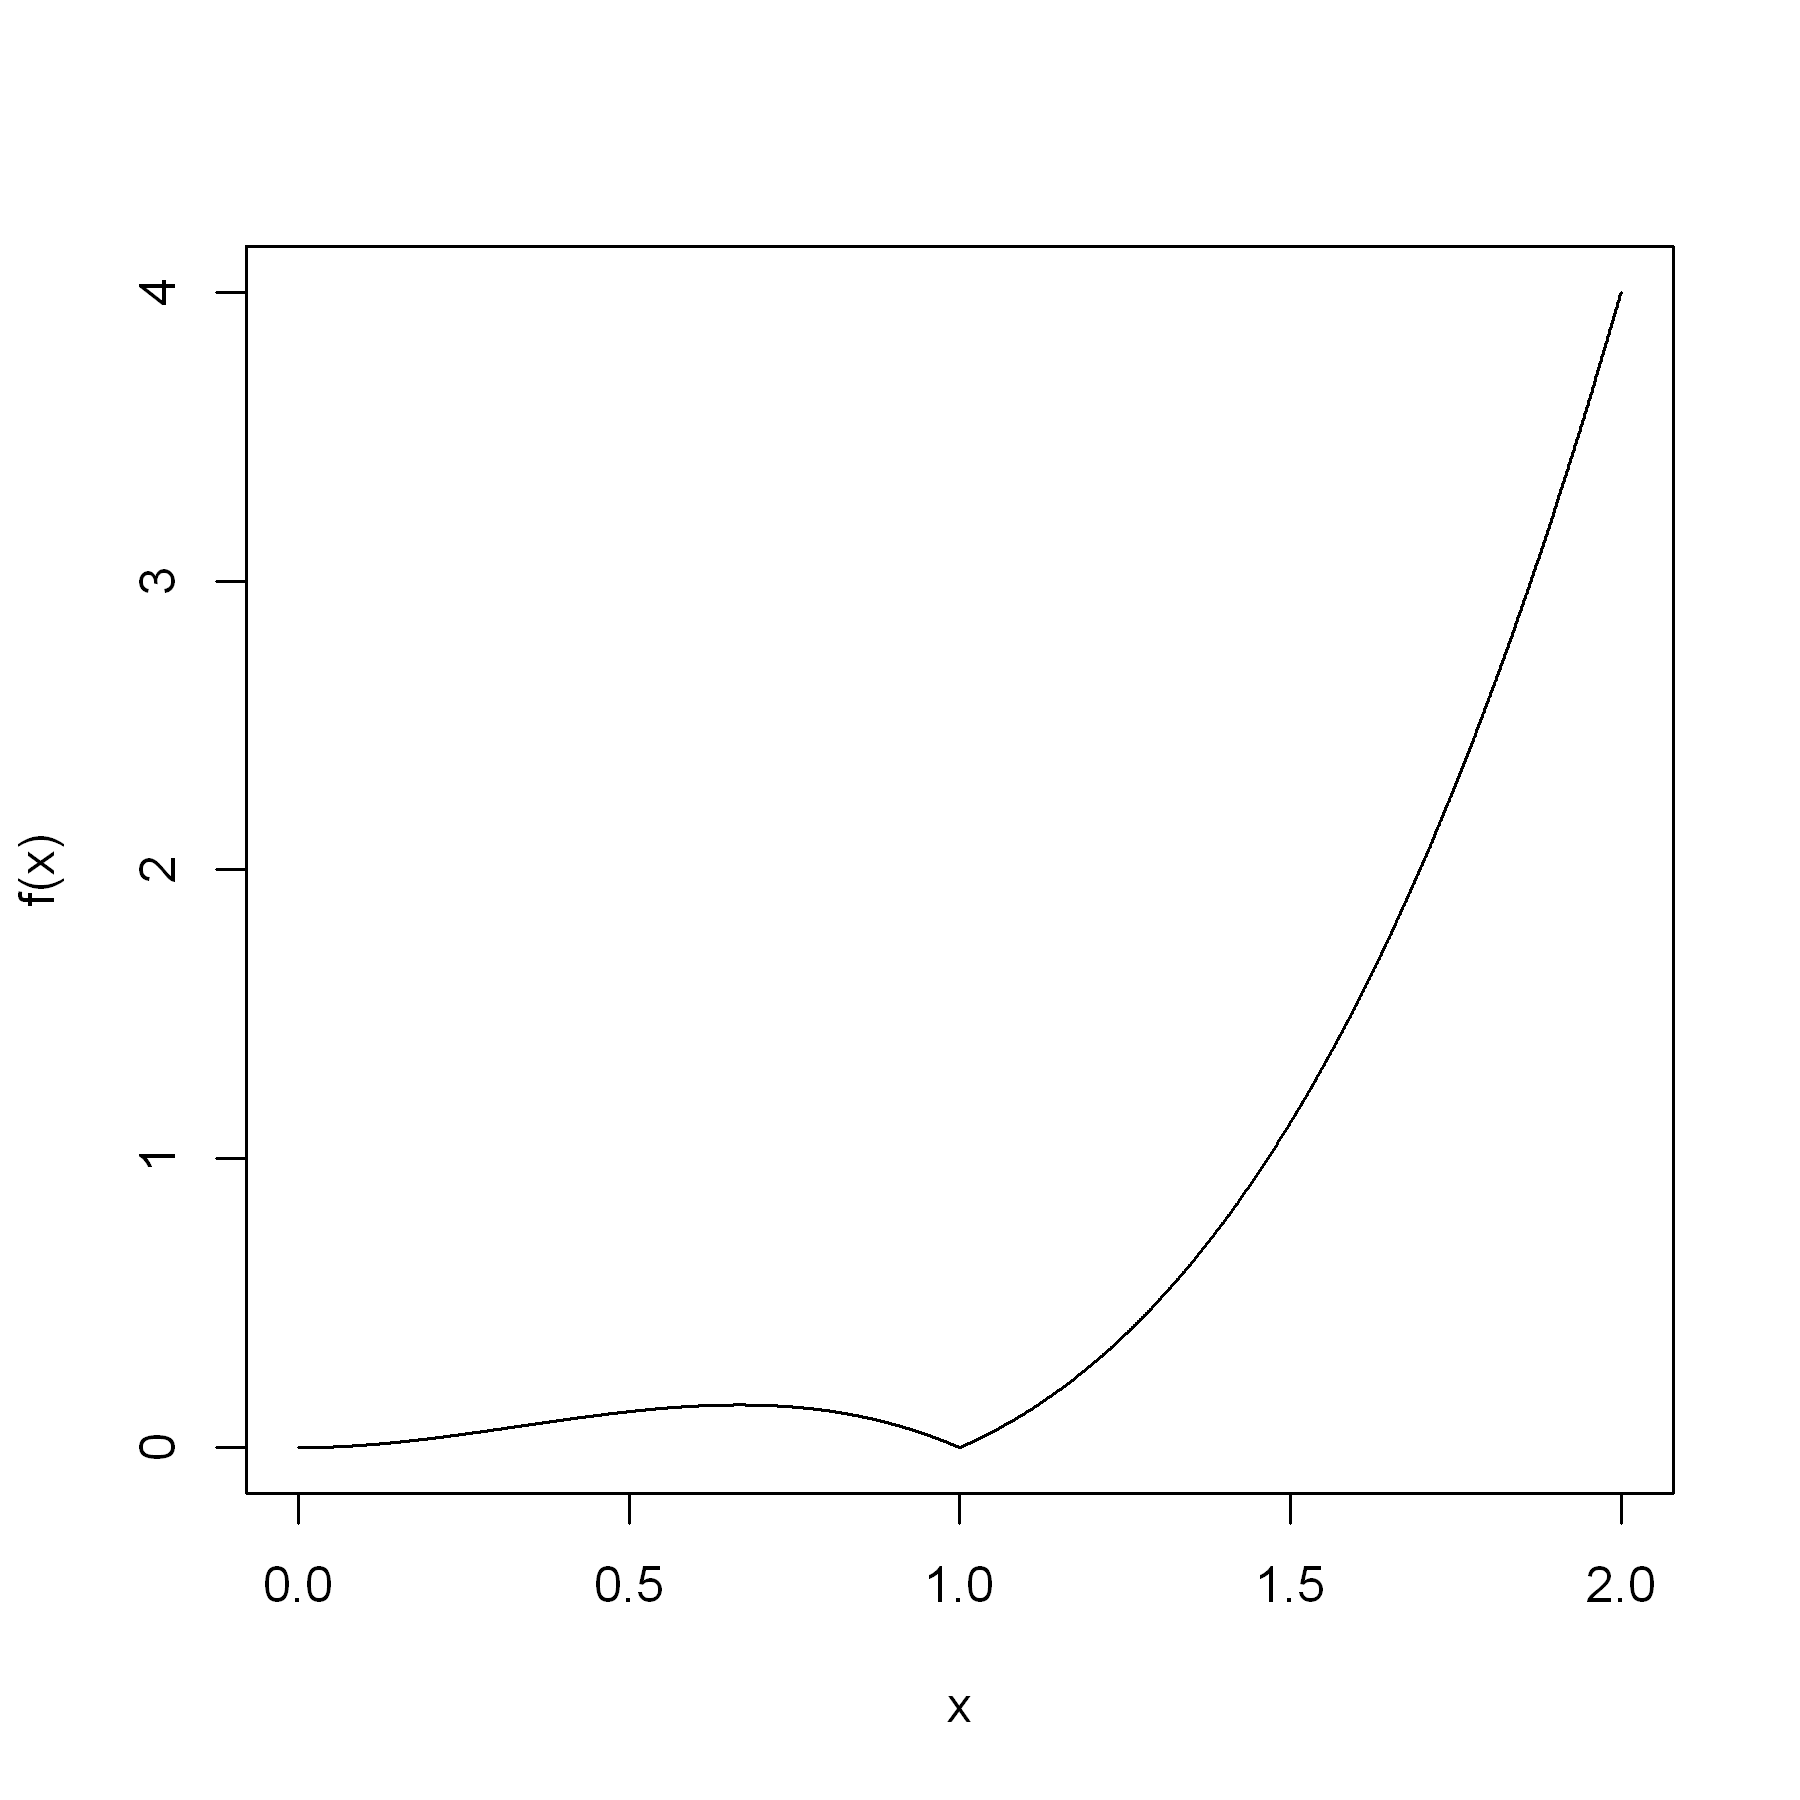

In [31]:
f = function(x) abs(x**2 *(x-1))

x = seq(0,2, by=0.001)

plot(x, f(x), type = 'l')

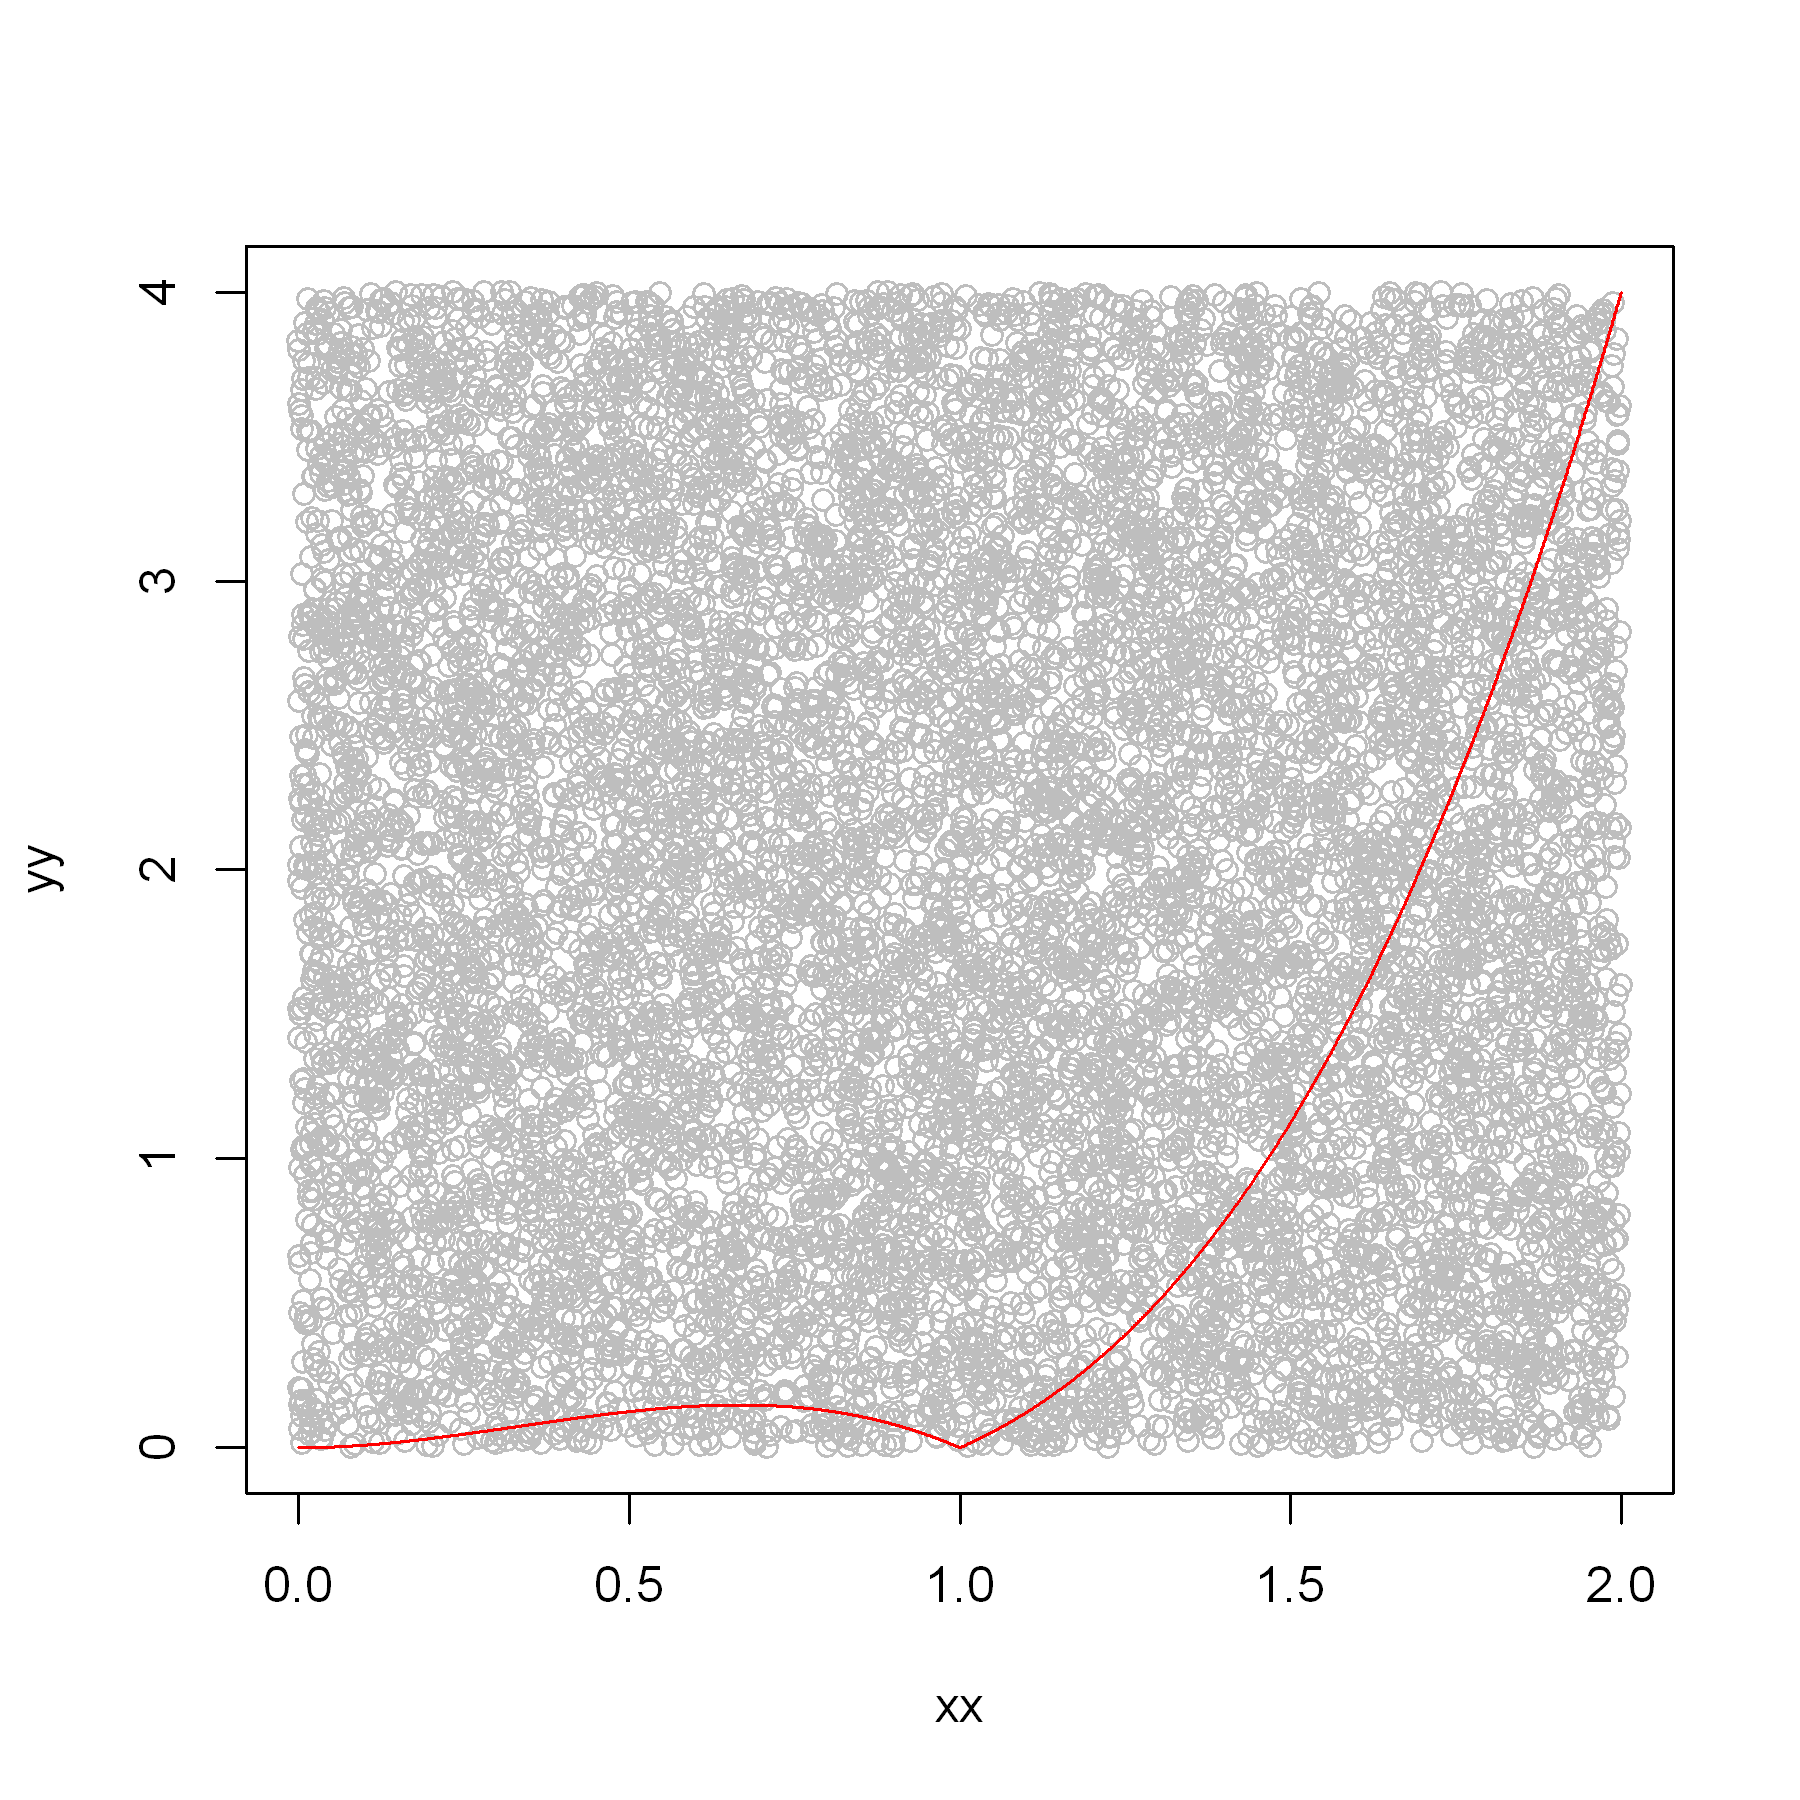

In [66]:
xx = runif(10000) * 2
yy = runif(10000) * 4

plot(xx, yy, col = 'gray')
lines(x, f(x), col = 'red')

- 빨간색 그래프 아래에 있는 넓이가 적분값이다. 

In [67]:
test = function(xx, yy){
    yy < f(xx)
}

In [68]:
A = test(xx, yy) 

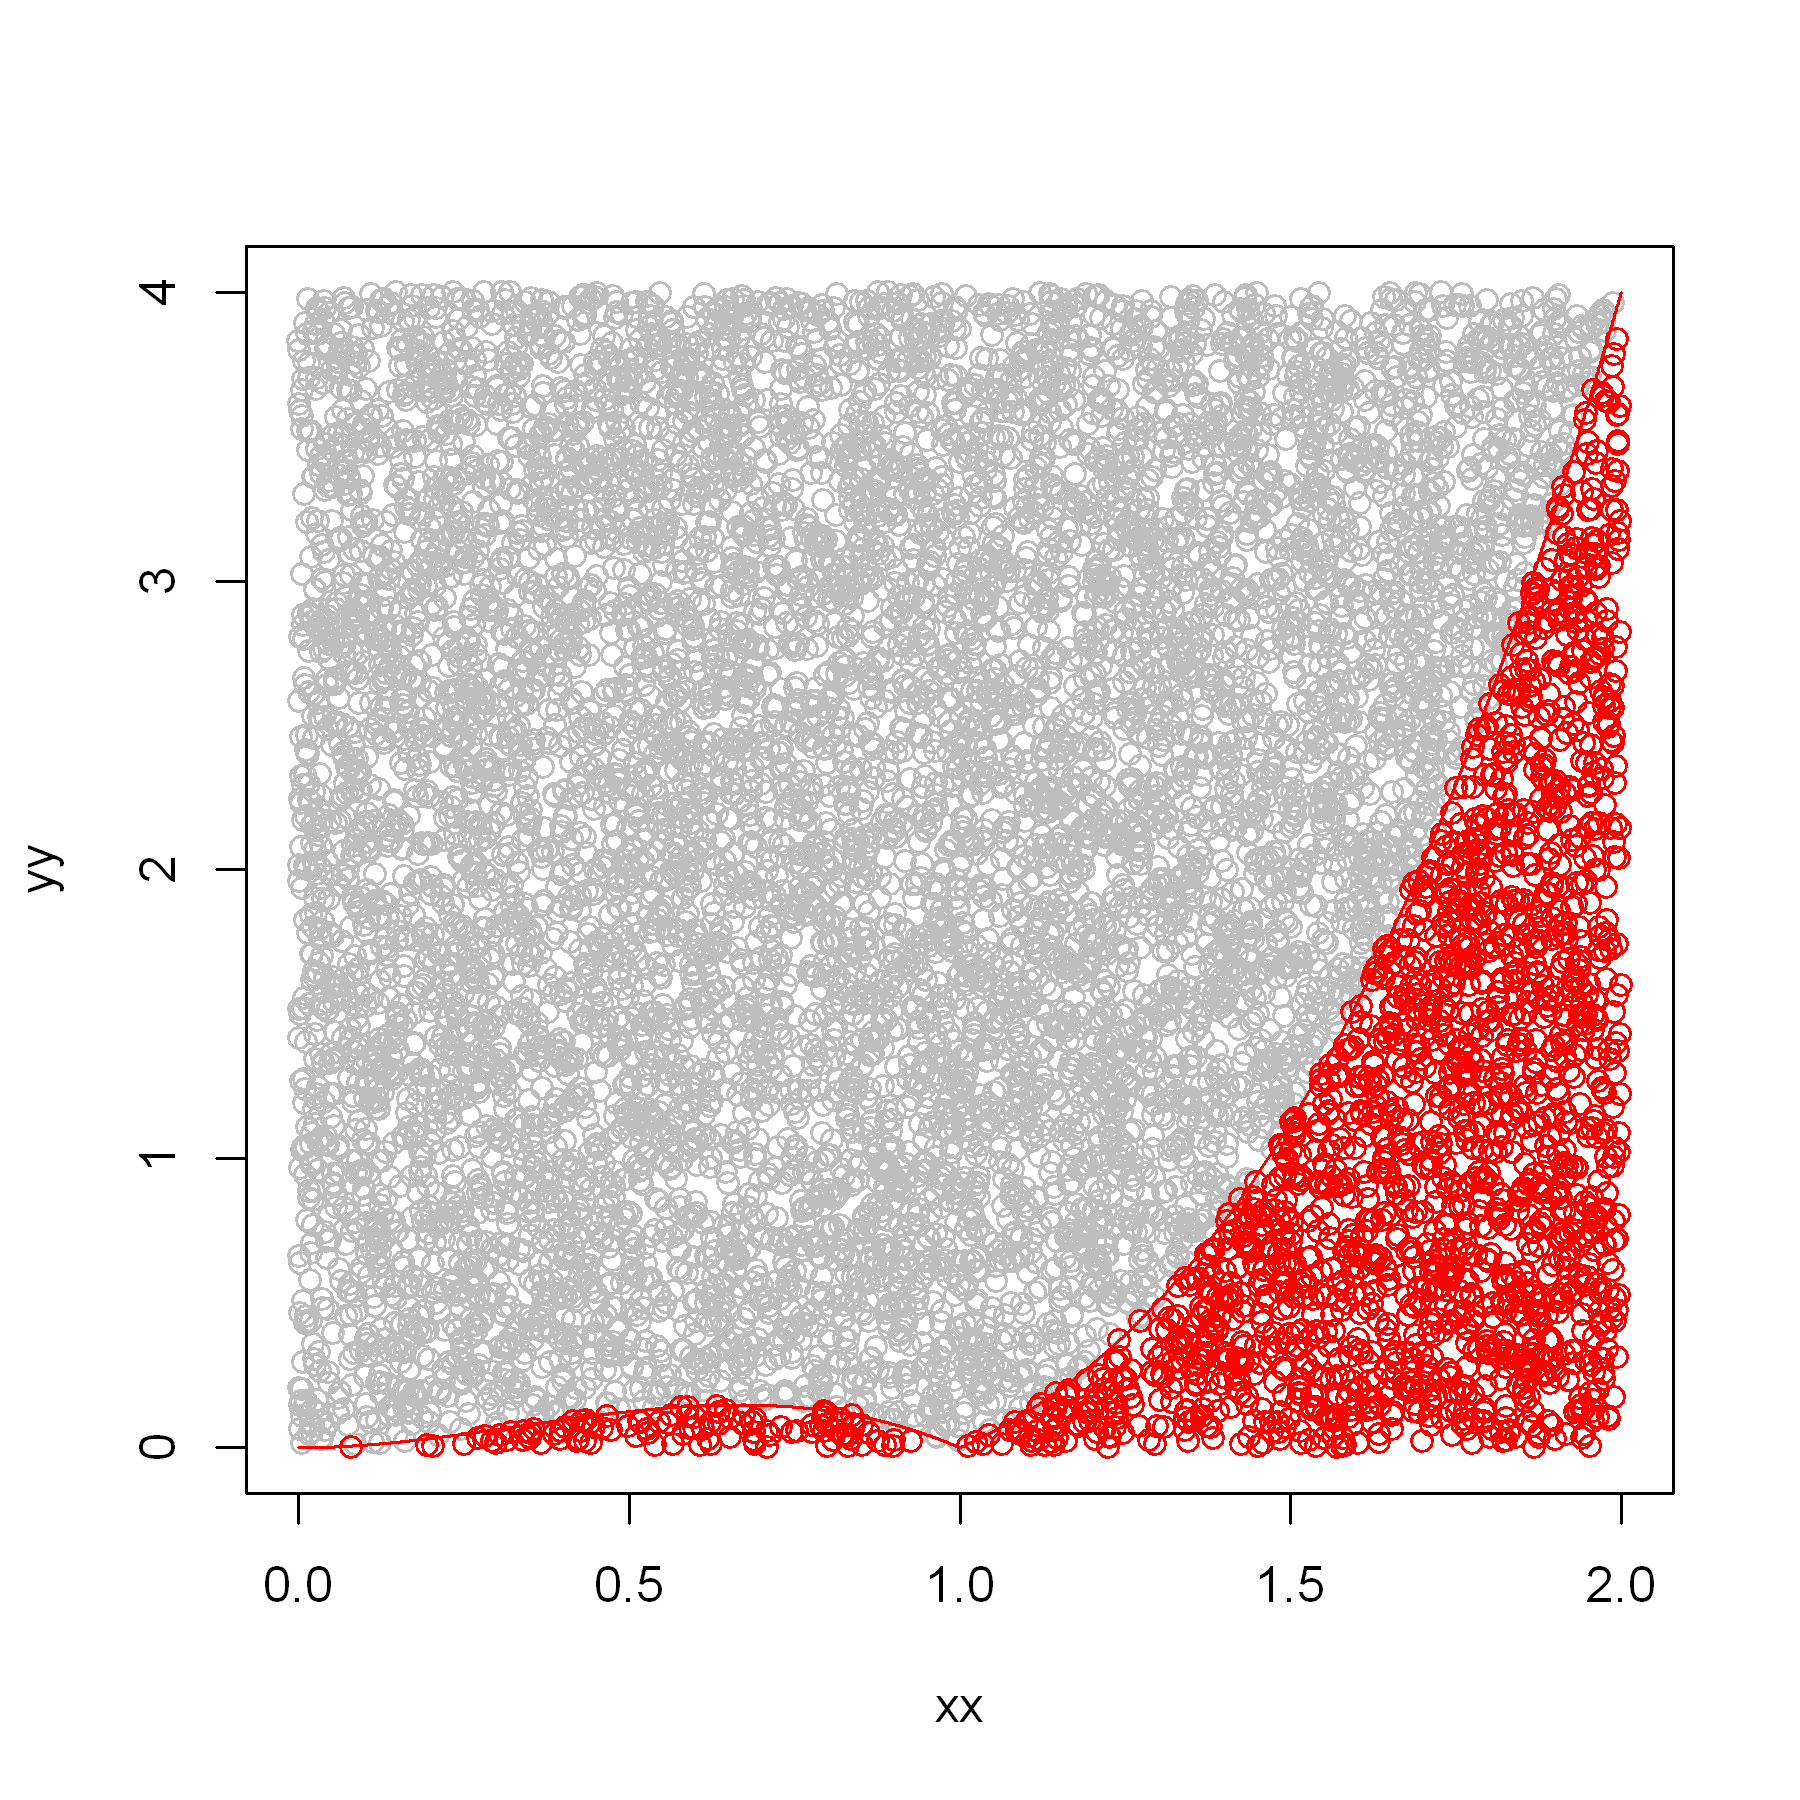

In [69]:
plot(xx, yy, col = "gray")
lines(x, f(x), col = "red")
points(xx[A], yy[A], col= "red")

$ \text{적분값} = \text{사각형의 크기}\times\dfrac{\text{빨간색 점의 개수}}{\text{전체 점의 개수}}$

In [70]:
8 * (sum(A)/length(A))

[1] 1.4864

- `Solution I`에서 구한 값과 유사하다.
- 표본을 늘리면 오차가 줄어들 것 같다.

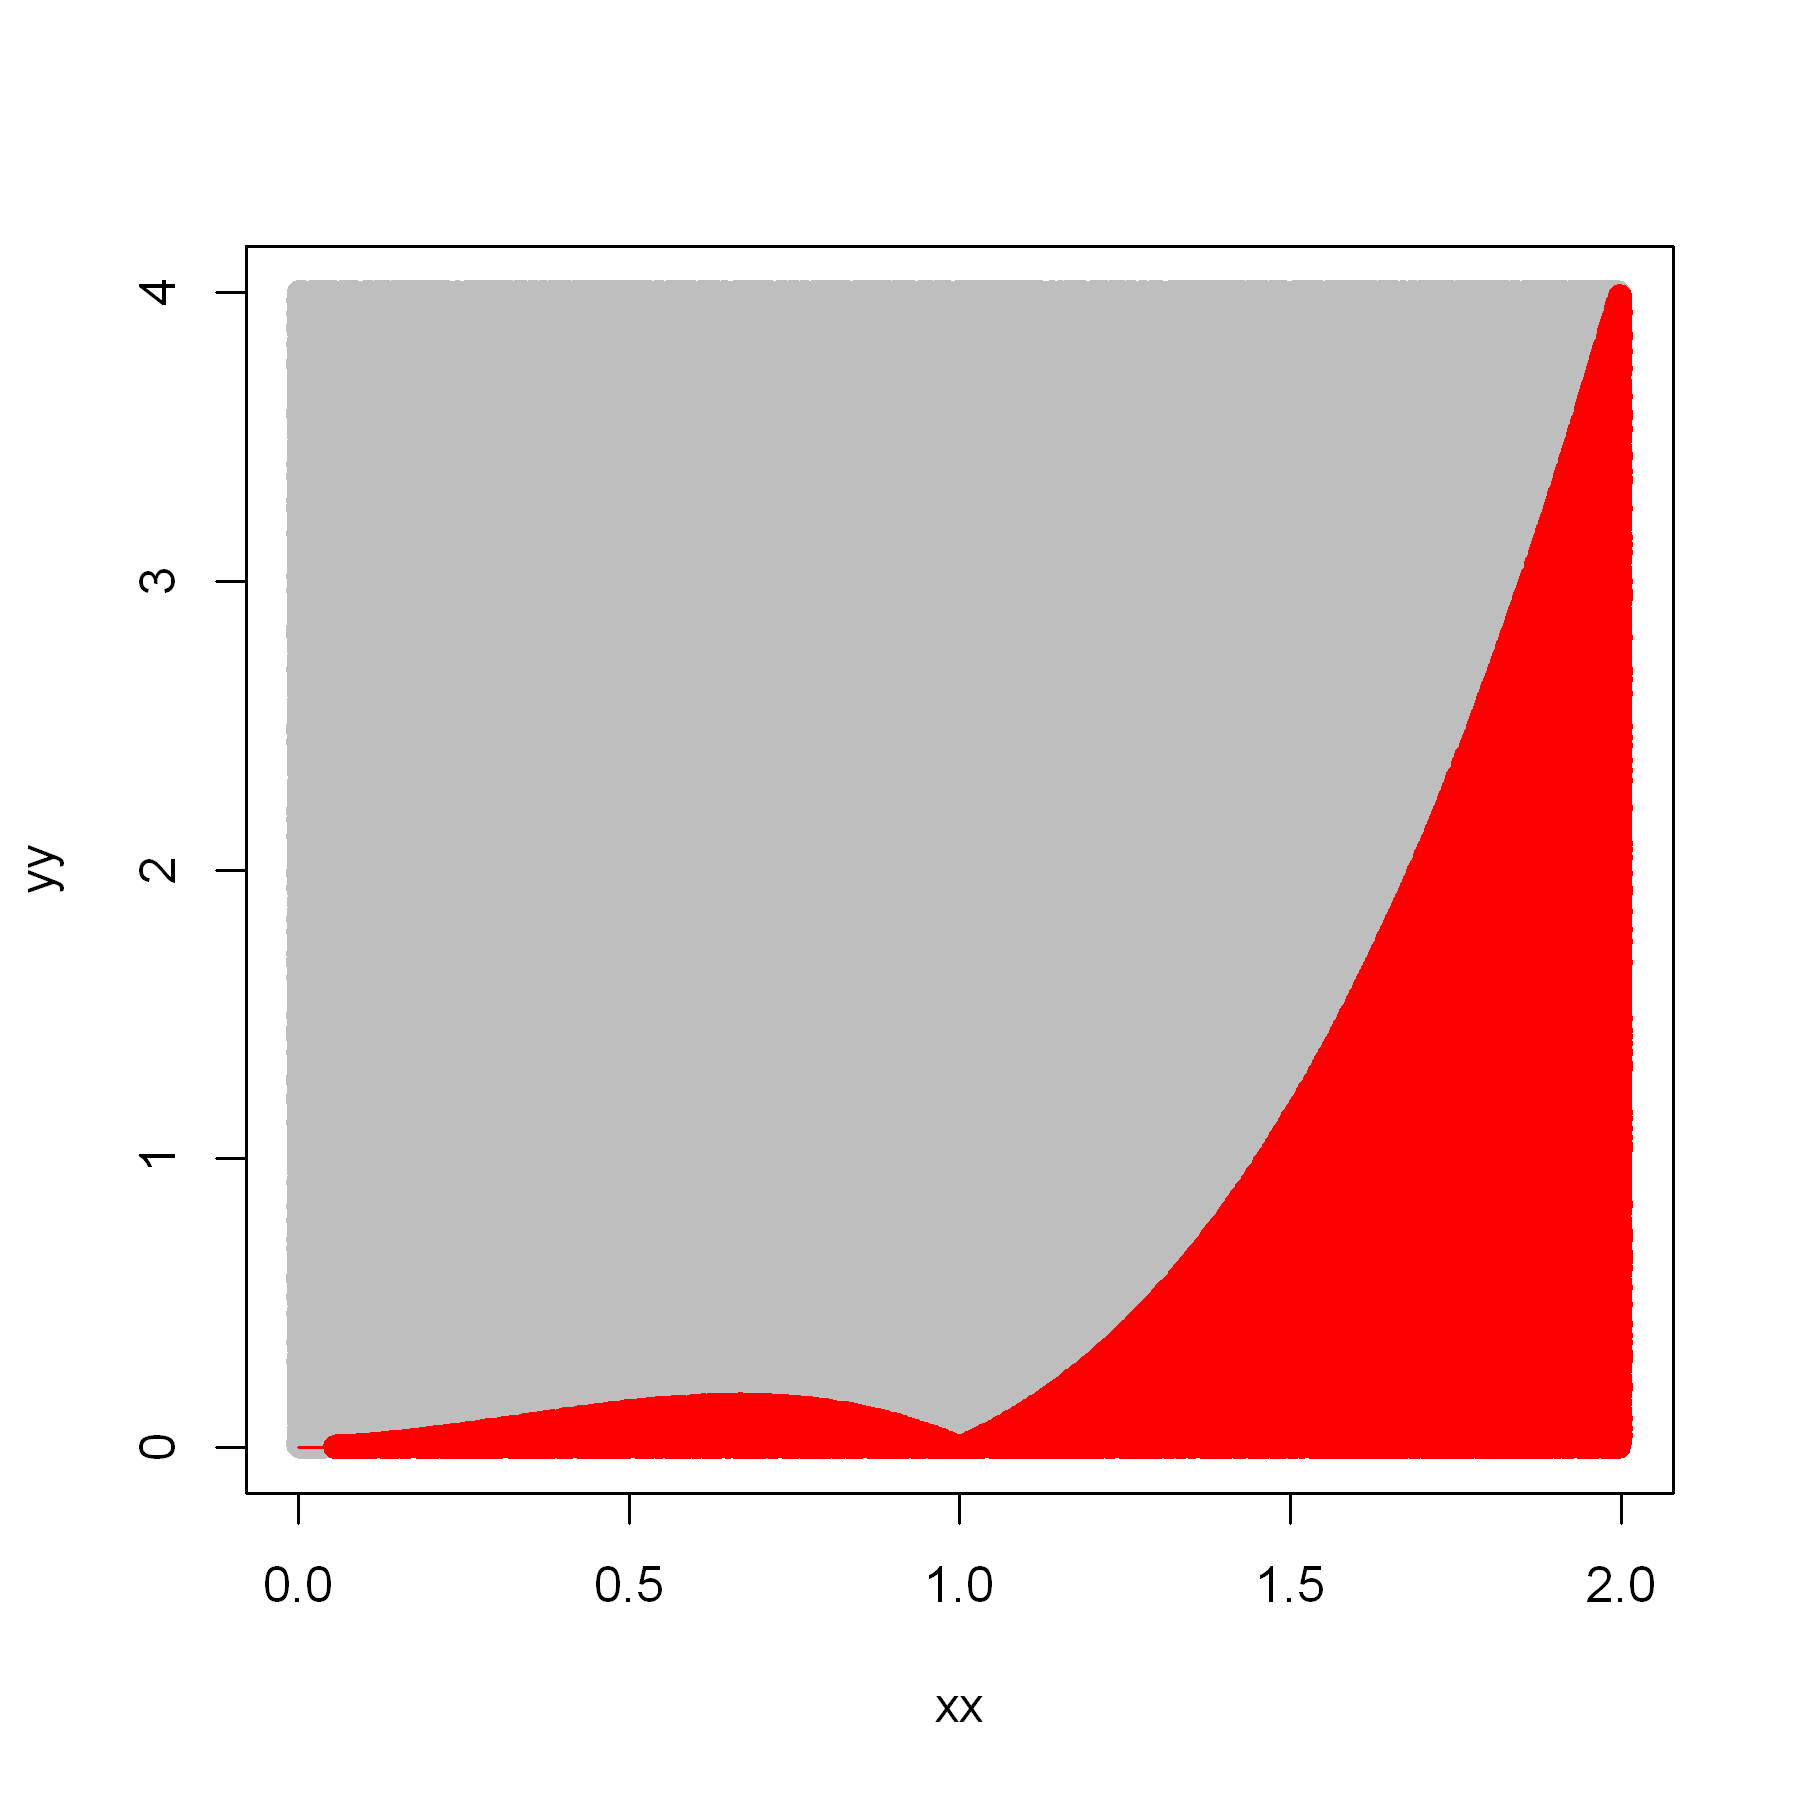

In [71]:
xx = runif(1000000) * 2
yy = runif(1000000) * 4
A = test(xx, yy)

plot(xx, yy, col = "gray")
lines(x, f(x), col = "red")
points(xx[A], yy[A], col= "red")

In [72]:
8 * (sum(A)/length(A))

[1] 1.501904

- 답은 1.5이다.

## rbinom(n, size = a, prob = b): 이항분포

- `rbinom(N, size = a, prob = b)`

- 앞면이 나올 확률이 **b**인 동전을 **a**번 던졌을 때 앞면이 나온 횟수를 리턴한다. 위 시행을 **n**번 반복한다.

- **b=0.5**이면 베르누이 분포이다.(베르누이 분포는 이항분포의 특수한 경우이다.)

In [108]:
rbinom(1,size=10,prob=0.9)

[1] 8

- 위 코드는 앞면이 나올 확률이 0.9인 동전을 10번 던졌더니 8번 앞면이 나온 것이다.

In [111]:
rbinom(1,size=10,prob=0.9)

[1] 7

- 위 코드는 앞면이 나올 확률이 0.9인 동전을 10번 던졌더니 7번 앞면이 나온 것이다. 

- 이러한 시행을 계속해서 반복하면, 즉 **N**의 크기를 늘린다면 그 평균은 9에 수렴하지 않겠는가? 실제로 그렇다.

In [115]:
rbinom(10000, size=10, prob=0.9) %>% mean

[1] 9.0044

## sample(a, size = n, prob = p, replace = TRUE or FALSE): 집합에서의 샘플링

- `sample(a, size = n)`를 실행하면 집합 **a**에서 **n**개의 원소를 비복원추출한다.

- `sample(a, size = n, replace = TRUE)`를 실행하면 집합 **a**에서 **n**개의 원소를 복원추출한다.

- `sample(a, size = n, prob = c(p_1, p_2 ....p_k))`을 실행하면 원소의 개수가 **k**인 집합 **a**에서 **n**개의 원소를 뽑되, 각 원소가 뽑힐 확률을 제어할 수 있다. 이 때 확률 벡터는 **a의 인덱스 순**으로 입력해야 한다.

In [155]:
set = c('red', 'red', 'blue', 'blue', 'blue')
sample(set, size = 4)

[1] "blue" "red"  "blue" "red" 

In [158]:
sample(set, size = 4)

[1] "blue" "blue" "blue" "red" 

In [159]:
sample(set, size = 4, replace = TRUE)

[1] "red"  "blue" "red"  "blue"

In [161]:
sample(set, size = 4, replace = TRUE)

[1] "blue" "red"  "red"  "blue"

In [180]:
set = c('red', 'blue')
sample(set, size = 5, prob = c(0.2, 0.8), replace = TRUE)

[1] "red"  "blue" "blue" "blue" "red" 

In [181]:
sample(set, size = 5, prob = c(0.2, 0.8))

ERROR: Error in sample.int(length(x), size, replace, prob): 'replace = FALSE' 일때는 모집단보다 큰 샘플을 가질 수 없습니다


- 위 코드는 비복원추출인데, 원소가 2개인 집합에서 5개의 원소를 뽑으려 했기 때문에 오류가 발생한 것이다.

In [182]:
#collapse-hide
set = c('red', 'blue')
rslt = matrix(rep("_", 1000*2), ncol = 2)
rslt

      [,1] [,2]
 [1,] _    _   
 [2,] _    _   
 [3,] _    _   
 [4,] _    _   
 [5,] _    _   
 [6,] _    _   
 [7,] _    _   
 [8,] _    _   
 [9,] _    _   
[10,] _    _   
[11,] _    _   
[12,] _    _   
[13,] _    _   
[14,] _    _   
[15,] _    _   
[16,] _    _   
[17,] _    _   
[18,] _    _   
[19,] _    _   
[20,] _    _   
[21,] _    _   
[22,] _    _   
[23,] _    _   
[24,] _    _   
[25,] _    _   
[26,] _    _   
[27,] _    _   
[28,] _    _   
[29,] _    _   
[30,] _    _   
[31,] <U+22EE> <U+22EE>
[32,] _    _   
[33,] _    _   
[34,] _    _   
[35,] _    _   
[36,] _    _   
[37,] _    _   
[38,] _    _   
[39,] _    _   
[40,] _    _   
[41,] _    _   
[42,] _    _   
[43,] _    _   
[44,] _    _   
[45,] _    _   
[46,] _    _   
[47,] _    _   
[48,] _    _   
[49,] _    _   
[50,] _    _   
[51,] _    _   
[52,] _    _   
[53,] _    _   
[54,] _    _   
[55,] _    _   
[56,] _    _   
[57,] _    _   
[58,] _    _   
[59,] _    _   
[60,] _    _   
[61,] _    _   

In [184]:
for (i in 1:1000) rslt[i,] = sample(set, size = 2, prob=c(0.95,0.05))
rslt

      [,1] [,2]
 [1,] red  blue
 [2,] red  blue
 [3,] red  blue
 [4,] red  blue
 [5,] red  blue
 [6,] red  blue
 [7,] red  blue
 [8,] red  blue
 [9,] red  blue
[10,] red  blue
[11,] red  blue
[12,] red  blue
[13,] red  blue
[14,] red  blue
[15,] blue red 
[16,] red  blue
[17,] red  blue
[18,] red  blue
[19,] red  blue
[20,] red  blue
[21,] red  blue
[22,] red  blue
[23,] red  blue
[24,] red  blue
[25,] red  blue
[26,] red  blue
[27,] red  blue
[28,] red  blue
[29,] red  blue
[30,] red  blue
[31,] <U+22EE> <U+22EE>
[32,] red  blue
[33,] red  blue
[34,] red  blue
[35,] red  blue
[36,] red  blue
[37,] red  blue
[38,] red  blue
[39,] red  blue
[40,] red  blue
[41,] red  blue
[42,] blue red 
[43,] red  blue
[44,] red  blue
[45,] red  blue
[46,] red  blue
[47,] red  blue
[48,] red  blue
[49,] red  blue
[50,] red  blue
[51,] red  blue
[52,] red  blue
[53,] red  blue
[54,] red  blue
[55,] red  blue
[56,] red  blue
[57,] red  blue
[58,] red  blue
[59,] red  blue
[60,] red  blue
[61,] red  blue

In [185]:
sum(rslt[,1] == "red")/1000

[1] 0.948

# 과제: 유리로 된 징검다리 건너기

![](image\20211119work.jpg)

유리와 강화유리가 한 쌍으로 이루어진 징검다리가 총 5개 있다고 하자.(따라서 징검다리는 모드 10개이다.)

강화유리로 된 징검다리를 밟으면 살아남지만 유리로 된 징검다리를 밟으면 죽는다.

따라서 강화유리로 된 징검다리를 골라야 살아남을 수 있다.

A씨는 유리공장에서 20년 근무한 장인으로 유리와 강화유리를 구분할 수 있는 능력을 가져서 강화유리로 된 징검다리를 고를 확률이 80%이다.

A씨가 살아남을 확률을 시뮬레이션을 통하여 구하여라.